# MLE challenge - Train model notebook

### Notebook 2

In this notebook, we train the model with a few features (for reasons of time and complexity in solving the challenge). It also shows how to persist the model in a file, load it into memory and then make a predict.



In [21]:
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, recall_score, 
    plot_confusion_matrix, precision_score, plot_roc_curve
)

from sklearn.ensemble import RandomForestClassifier

#### Read dataset

In [22]:
path = '/home/marchelo/MarcheloBragagnini/chambas/MLE/MLE_Challenge-20220201T160554Z-001/MLE_Challenge/dataset_for_train'
fileTrain = 'train_model.csv'

df = pd.read_csv(os.path.join(path, fileTrain),sep=';')

In [23]:
df.head()

,id,nb_previous_loans,avg_amount_loans_previous,age,years_on_the_job,flag_own_car,status
0,5009033,16,130.37344,51,-999,0,0
1,5009304,34,131.72919,60,-999,0,0
2,5009355,25,134.17929,54,14,0,0
3,5009429,2,115.19316,24,3,0,0
4,5010070,10,126.83809,30,2,0,0


In [24]:
df.dtypes

id                             int64
nb_previous_loans              int64
avg_amount_loans_previous    float64
age                            int64
years_on_the_job               int64
flag_own_car                   int64
status                         int64
dtype: object

<AxesSubplot:>

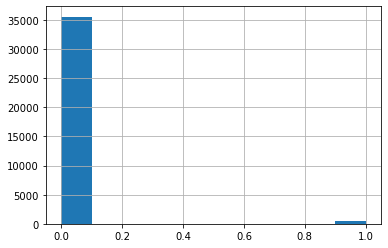

In [25]:
df.status.hist()

In [26]:
cust_df = df.copy()

In [27]:
cust_df.fillna(0, inplace=True)

In [28]:
# drop idColumn.
# this column is not a feature for making a prediction
cust_df.drop(['id'], axis=1,inplace=True)

## Train model

In [29]:
Y = cust_df['status']

cust_df.drop(['status'], axis=1, inplace=True)

X = cust_df

In [30]:
# Using Synthetic Minority Over-Sampling Technique(SMOTE) to overcome sample imbalance problem.
Y = Y.astype('int')
X_balance, Y_balance = SMOTE().fit_resample(X, Y)
X_balance = pd.DataFrame(X_balance, columns=X.columns)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_balance,Y_balance, 
                                                    stratify=Y_balance, test_size=0.3,
                                                    random_state = 123)

Accuracy Score is 0.92924
Precision Score is 0.90681
Recall Score is 0.90681
      0      1
0  9621   1049
1   461  10208


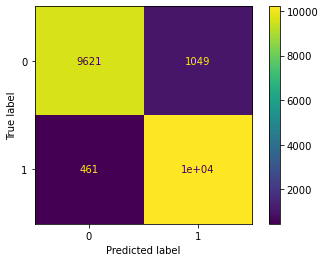

In [32]:
model = RandomForestClassifier(n_estimators=5)

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(precision_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

plot_confusion_matrix(model, X_test, y_test)  
plt.show()


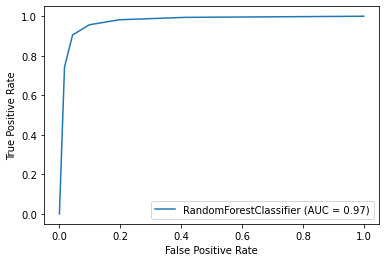

In [33]:
plot_roc_curve(model, X_test, y_test)
plt.show()

## Model persistance

In [34]:
from joblib import dump, load

In [ ]:
pathModels = '/home/marchelo/MarcheloBragagnini/chambas/MLE/MLE_Challenge-20220201T160554Z-001/MLE_Challenge/models'
nameModel = 'model_risk_RandomForestClassifier_withDataSet01.joblib'

In [ ]:
# dump model
dump(model, os.path.join(pathModels,nameModel) ) 

### Load model & predict

In [ ]:
pathModels = '/home/marchelo/MarcheloBragagnini/chambas/MLE/MLE_Challenge-20220201T160554Z-001/MLE_Challenge/models'
nameModel = 'model_risk_RandomForestClassifier_withDataSet01.joblib'

In [ ]:
my_model = load(os.path.join(pathModels,nameModel)) 

In [ ]:
# example dict 'user_id' -> features
d = {
    '5008804': [32, 12, 2, 119.45, 1],
    '5008807': [29, 2, 1, 100, 0]
}

In [ ]:
my_model.predict([d['5008804']])